# Load Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
coding = pd.read_csv("coding_9_features.csv")
noncoding = pd.read_csv("noncoding_9_features_diff.csv")

### Dropping ORF Ratio and adding new column

In [4]:
coding = coding.drop("ORF Ratio", axis=1)

In [5]:
coding["ORF Ratio"] = coding["ORF Length"] / coding["Transcript Length"]

In [6]:
noncoding = noncoding.drop("ORF Ratio", axis=1)

In [7]:
noncoding["ORF Ratio"] = noncoding["ORF Length"] / noncoding["Transcript Length"]

### Adding columns for CpG/ORF and GC/ORF

In [8]:
coding["CpG Islands per ORF Length"] = coding["CpG Islands"] / coding["ORF Length"]

In [9]:
coding["GC content per ORF Length"] = coding["GC content"] / coding["ORF Length"]

In [10]:
noncoding["CpG Islands per ORF Length"] = noncoding["CpG Islands"] / noncoding["ORF Length"]

In [11]:
noncoding["GC content per ORF Length"] = noncoding["GC content"] / noncoding["ORF Length"]

In [12]:
coding

Fickett Score  GC content  CpG Islands  Transcript Length  ORF Length  \
0              0.3871    0.359435           18               2618         981   
1              0.9340    0.460064            8                939         939   
2              0.9340    0.460064            8                939         939   
3              1.0718    0.699278          302               3465        2535   
4              1.0718    0.699250          302               3468        2538   
...               ...         ...          ...                ...         ...   
111270         1.1760    0.401734            9                346          54   
111271         1.1895    0.430976            6                297         297   
111272         1.2356    0.442671           31               1378         300   
111273         1.2880    0.449227           40               1812         201   
111274         1.0230    0.426667            8                525         372   

        Relative Codon Bias  Isoelectric Potential  Aromaticity  \
0                  0.284229               9.588915     0.112385   
1                  0.460470               9.042610     0.137821   
2                  0.460470               9.042610     0.137821   
3                  0.270346              11.870000     0.051948   
4                  0.271500              11.870000     0.051903   
...                     ...                    ...          ...   
111270             0.647228               4.454040     0.095652   
111271             0.843020               5.727063     0.071429   
111272             0.423575               9.402150     0.074074   
111273             0.358543               9.144276     0.091211   
111274             0.624221               4.311204     0.120000   

        coding/noncoding  ORF Ratio  CpG Islands per ORF Length  \
0                      1   0.374714                    0.018349   
1                      1   1.000000                    0.008520   
2                      1   1.000000                    0.008520   
3                      1   0.731602                    0.119132   
4                      1   0.731834                    0.118991   
...                  ...        ...                         ...   
111270                 1   0.156069                    0.166667   
111271                 1   1.000000                    0.020202   
111272                 1   0.217707                    0.103333   
111273                 1   0.110927                    0.199005   
111274                 1   0.708571                    0.021505   

        GC content per ORF Length  
0                        0.000366  
1                        0.000490  
2                        0.000490  
3                        0.000276  
4                        0.000276  
...                           ...  
111270                   0.007440  
111271                   0.001451  
111272                   0.001476  
111273                   0.002235  
111274                   0.001147  

[111275 rows x 12 columns]

In [13]:
noncoding

Fickett Score  GC content  CpG Islands  Transcript Length  ORF Length  \
0              0.5161    0.553539           23               1653         390   
1              0.5317    0.552933           21               1483         402   
2              0.6679    0.580696           10                632         180   
3              0.5273    0.617357           18                507         165   
4              0.6262    0.597692           34               1213         165   
...               ...         ...          ...                ...         ...   
173106         0.5569    0.506690           29               1121         165   
173107         0.4921    0.534676           38                894          93   
173108         0.4298    0.519265           89               2232         405   
173109         0.3876    0.429412            8               1360         207   
173110         0.5059    0.512064           55               1492         159   

        Relative Codon Bias  Isoelectric Potential  Aromaticity  \
0                  0.466010               8.557163     0.079855   
1                  0.428935               8.525573     0.056680   
2                  0.591729               8.961508     0.057143   
3                  0.659118              11.371079     0.059172   
4                  0.529159              10.728845     0.059406   
...                     ...                    ...          ...   
173106             0.404011               9.778000     0.050938   
173107             0.439534               9.988038     0.077441   
173108             0.308874               9.880441     0.084677   
173109             0.469681               8.829928     0.092715   
173110             0.387534               9.994034     0.078471   

        coding/noncoding  ORF Ratio  CpG Islands per ORF Length  \
0                      0   0.235935                    0.058974   
1                      0   0.271072                    0.052239   
2                      0   0.284810                    0.055556   
3                      0   0.325444                    0.109091   
4                      0   0.136026                    0.206061   
...                  ...        ...                         ...   
173106                 0   0.147190                    0.175758   
173107                 0   0.104027                    0.408602   
173108                 0   0.181452                    0.219753   
173109                 0   0.152206                    0.038647   
173110                 0   0.106568                    0.345912   

        GC content per ORF Length  
0                        0.001419  
1                        0.001375  
2                        0.003226  
3                        0.003742  
4                        0.003622  
...                           ...  
173106                   0.003071  
173107                   0.005749  
173108                   0.001282  
173109                   0.002074  
173110                   0.003221  

[173111 rows x 12 columns]

In [14]:
coding.shape

(111275, 12)

In [15]:
noncoding.shape

(173111, 12)

In [16]:
# taking 111200 sequences from both dataframes
noncoding = noncoding.head(111200)
coding = coding.head(111200)

In [17]:
# combining both dataframes
dataset1 = coding.merge(noncoding, how = "outer")


In [18]:
dataset1.shape

(222400, 12)

In [19]:
dataset1.head()

Fickett Score  GC content  CpG Islands  Transcript Length  ORF Length  \
0         0.3871    0.359435           18               2618         981   
1         0.9340    0.460064            8                939         939   
2         0.9340    0.460064            8                939         939   
3         1.0718    0.699278          302               3465        2535   
4         1.0718    0.699250          302               3468        2538   

   Relative Codon Bias  Isoelectric Potential  Aromaticity  coding/noncoding  \
0             0.284229               9.588915     0.112385                 1   
1             0.460470               9.042610     0.137821                 1   
2             0.460470               9.042610     0.137821                 1   
3             0.270346              11.870000     0.051948                 1   
4             0.271500              11.870000     0.051903                 1   

   ORF Ratio  CpG Islands per ORF Length  GC content per ORF Length  
0   0.374714                    0.018349                   0.000366  
1   1.000000                    0.008520                   0.000490  
2   1.000000                    0.008520                   0.000490  
3   0.731602                    0.119132                   0.000276  
4   0.731834                    0.118991                   0.000276

In [20]:
dataset1.tail()

Fickett Score  GC content  CpG Islands  Transcript Length  ORF Length  \
222395         0.4830    0.494624            7                558         159   
222396         0.5244    0.574233           52                815         183   
222397         0.5020    0.415437            3                881         120   
222398         0.4081    0.373988           18               3706         357   
222399         0.4855    0.492435           28                727         162   

        Relative Codon Bias  Isoelectric Potential  Aromaticity  \
222395             0.459977               4.953825     0.096774   
222396             0.418751               9.658154     0.077491   
222397             0.450101               9.149240     0.129693   
222398             0.261959               9.695288     0.111741   
222399             0.358038               9.196044     0.128099   

        coding/noncoding  ORF Ratio  CpG Islands per ORF Length  \
222395                 0   0.284946                    0.044025   
222396                 0   0.224540                    0.284153   
222397                 0   0.136209                    0.025000   
222398                 0   0.096330                    0.050420   
222399                 0   0.222834                    0.172840   

        GC content per ORF Length  
222395                   0.003111  
222396                   0.003138  
222397                   0.003462  
222398                   0.001048  
222399                   0.003040

In [21]:
# shuffle the dataset
shuffled_dataset = dataset1.sample(frac=1, random_state = 42)

In [22]:
shuffled_dataset.head()

Fickett Score  GC content  CpG Islands  Transcript Length  ORF Length  \
130060         0.4871    0.440096           15               1252         246   
122973         0.4975    0.634871           89               1279         186   
143354         0.3740    0.402494            9               2005         201   
210043         0.4390    0.480164           11                731         141   
106295         1.2011    0.611160           65               1147         681   

        Relative Codon Bias  Isoelectric Potential  Aromaticity  \
130060             0.418197               9.973082     0.086331   
122973             0.365943              11.686200     0.042254   
143354             0.371544               9.831574     0.079341   
210043             0.427099               7.667375     0.106996   
106295             0.424952              10.347965     0.023560   

        coding/noncoding  ORF Ratio  CpG Islands per ORF Length  \
130060                 0   0.196486                    0.060976   
122973                 0   0.145426                    0.478495   
143354                 0   0.100249                    0.044776   
210043                 0   0.192886                    0.078014   
106295                 1   0.593723                    0.095448   

        GC content per ORF Length  
130060                   0.001789  
122973                   0.003413  
143354                   0.002002  
210043                   0.003405  
106295                   0.000897

In [23]:
print(shuffled_dataset.isna().sum())

Fickett Score                   0
GC content                      0
CpG Islands                     0
Transcript Length               0
ORF Length                      0
Relative Codon Bias             0
Isoelectric Potential           0
Aromaticity                     0
coding/noncoding                0
ORF Ratio                       0
CpG Islands per ORF Length    106
GC content per ORF Length       0
dtype: int64


In [24]:
print(np.isinf(shuffled_dataset).sum())

Fickett Score                    0
GC content                       0
CpG Islands                      0
Transcript Length                0
ORF Length                       0
Relative Codon Bias              0
Isoelectric Potential            0
Aromaticity                      0
coding/noncoding                 0
ORF Ratio                        0
CpG Islands per ORF Length    2429
GC content per ORF Length     2535
dtype: int64


In [25]:
shuffled_dataset.replace([np.inf, -np.inf], 0, inplace=True)

In [26]:
shuffled_dataset.fillna(0, inplace=True)

## Test Train Split 

In [27]:
train, test = train_test_split(shuffled_dataset, test_size=0.2, random_state=42)

In [28]:
train.shape

(177920, 12)

In [29]:
test.shape

(44480, 12)

## Logistic Regression

## F1

In [30]:
from sklearn.linear_model import LogisticRegression

X_train = train.drop(['coding/noncoding', 'Transcript Length', 'Relative Codon Bias', 'Isoelectric Potential', 'Aromaticity', 'GC content', 'CpG Islands'], axis=1) # Done to seperate the features and the target variable
y_train = train['coding/noncoding']

X_test = test.drop(['coding/noncoding', 'Transcript Length', 'Relative Codon Bias', 'Isoelectric Potential', 'Aromaticity', 'GC content', 'CpG Islands'], axis=1)
y_test = test['coding/noncoding']

lr = LogisticRegression()

lr.fit(X_train, y_train) # Model Fitting

y_pred = lr.predict(X_test) # Predicting...

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.8513938848920863


In [62]:
X_train

Fickett Score  ORF Length  ORF Ratio  CpG Islands per ORF Length  \
193315         0.3876         207   0.252439                    0.028986   
94962          1.0007         783   0.581292                    0.123883   
60575          1.0487         780   0.859978                    0.026923   
73177          1.0612          93   0.214286                    0.322581   
187107         0.6507          99   0.151145                    0.040404   
...               ...         ...        ...                         ...   
172354         0.5503          48   0.192771                    0.000000   
20547          0.5838         825   0.451313                    0.067879   
217311         0.4523         141   0.291322                    0.056738   
94743          0.5386         723   0.337850                    0.100968   
56884          0.7474          51   0.089947                    0.588235   

        GC content per ORF Length  
193315                   0.001803  
94962                    0.000780  
60575                    0.000660  
73177                    0.006987  
187107                   0.004472  
...                           ...  
172354                   0.008367  
20547                    0.000612  
217311                   0.003868  
94743                    0.000788  
56884                    0.010305  

[177920 rows x 5 columns]

## F2

In [64]:
from sklearn.linear_model import LogisticRegression

X_train = train.drop(['coding/noncoding', 'GC content', 'Transcript Length', 'Relative Codon Bias', 'Isoelectric Potential', 'Aromaticity'], axis=1) # Done to seperate the features and the target variable
y_train = train['coding/noncoding']

X_test = test.drop(['coding/noncoding', 'GC content', 'Transcript Length', 'Relative Codon Bias', 'Isoelectric Potential', 'Aromaticity'], axis=1)
y_test = test['coding/noncoding']

lr = LogisticRegression()

lr.fit(X_train, y_train) # Model Fitting

y_pred = lr.predict(X_test) # Predicting...

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.8537320143884892


In [42]:
X_train

Fickett Score  CpG Islands  ORF Length  ORF Ratio  \
193315         0.3876            6         207   0.252439   
94962          1.0007           97         783   0.581292   
60575          1.0487           21         780   0.859978   
73177          1.0612           30          93   0.214286   
187107         0.6507            4          99   0.151145   
...               ...          ...         ...        ...   
172354         0.5503            0          48   0.192771   
20547          0.5838           56         825   0.451313   
217311         0.4523            8         141   0.291322   
94743          0.5386           73         723   0.337850   
56884          0.7474           30          51   0.089947   

        CpG Islands per ORF Length  GC content per ORF Length  
193315                    0.028986                   0.001803  
94962                     0.123883                   0.000780  
60575                     0.026923                   0.000660  
73177                     0.322581                   0.006987  
187107                    0.040404                   0.004472  
...                            ...                        ...  
172354                    0.000000                   0.008367  
20547                     0.067879                   0.000612  
217311                    0.056738                   0.003868  
94743                     0.100968                   0.000788  
56884                     0.588235                   0.010305  

[177920 rows x 6 columns]

In [50]:
train

Fickett Score  GC content  CpG Islands  Transcript Length  ORF Length  \
193315         0.3876    0.373171            6                820         207   
94962          1.0007    0.610987           97               1347         783   
60575          1.0487    0.514884           21                907         780   
73177          1.0612    0.649770           30                434          93   
187107         0.6507    0.442748            4                655          99   
...               ...         ...          ...                ...         ...   
172354         0.5503    0.401606            0                249          48   
20547          0.5838    0.504923           56               1828         825   
217311         0.4523    0.545455            8                484         141   
94743          0.5386    0.569626           73               2140         723   
56884          0.7474    0.525573           30                567          51   

        Relative Codon Bias  Isoelectric Potential  Aromaticity  \
193315             0.456849               9.422909     0.132353   
94962              0.436124               8.628916     0.095768   
60575              0.471875               9.775035     0.072848   
73177              0.470876              11.421106     0.076389   
187107             0.582867               9.712501     0.110092   
...                     ...                    ...          ...   
172354             0.761096               5.143838     0.121951   
20547              0.428944               9.754212     0.101806   
217311             0.746180              10.007701     0.062112   
94743              0.315923               9.217126     0.071529   
56884              0.635044              10.160685     0.089947   

        coding/noncoding  ORF Ratio  CpG Islands per ORF Length  \
193315                 0   0.252439                    0.028986   
94962                  1   0.581292                    0.123883   
60575                  1   0.859978                    0.026923   
73177                  1   0.214286                    0.322581   
187107                 0   0.151145                    0.040404   
...                  ...        ...                         ...   
172354                 0   0.192771                    0.000000   
20547                  1   0.451313                    0.067879   
217311                 0   0.291322                    0.056738   
94743                  1   0.337850                    0.100968   
56884                  1   0.089947                    0.588235   

        GC content per ORF Length  
193315                   0.001803  
94962                    0.000780  
60575                    0.000660  
73177                    0.006987  
187107                   0.004472  
...                           ...  
172354                   0.008367  
20547                    0.000612  
217311                   0.003868  
94743                    0.000788  
56884                    0.010305  

[177920 rows x 12 columns]

## F3

In [66]:
from sklearn.linear_model import LogisticRegression

X_train = train.drop(['GC content', 'Transcript Length', 'coding/noncoding'], axis=1) # Done to seperate the features and the target variable
y_train = train['coding/noncoding']

X_test = test.drop(['GC content', 'Transcript Length', 'coding/noncoding'], axis=1)
y_test = test['coding/noncoding']

lr = LogisticRegression()

lr.fit(X_train, y_train) # Model Fitting

y_pred = lr.predict(X_test) # Predicting...

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.8572841726618705


## F4

In [68]:
from sklearn.linear_model import LogisticRegression

X_train = train.drop(['GC content', 'Transcript Length', 'Relative Codon Bias','coding/noncoding', 'ORF Ratio'], axis=1) # Done to seperate the features and the target variable
y_train = train['coding/noncoding']

X_test = test.drop(['GC content', 'Transcript Length', 'Relative Codon Bias', 'coding/noncoding', 'ORF Ratio'], axis=1)
y_test = test['coding/noncoding']

lr = LogisticRegression()

lr.fit(X_train, y_train) # Model Fitting

y_pred = lr.predict(X_test) # Predicting...

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.8504721223021583


In [59]:
train

Fickett Score  GC content  CpG Islands  Transcript Length  ORF Length  \
193315         0.3876    0.373171            6                820         207   
94962          1.0007    0.610987           97               1347         783   
60575          1.0487    0.514884           21                907         780   
73177          1.0612    0.649770           30                434          93   
187107         0.6507    0.442748            4                655          99   
...               ...         ...          ...                ...         ...   
172354         0.5503    0.401606            0                249          48   
20547          0.5838    0.504923           56               1828         825   
217311         0.4523    0.545455            8                484         141   
94743          0.5386    0.569626           73               2140         723   
56884          0.7474    0.525573           30                567          51   

        Relative Codon Bias  Isoelectric Potential  Aromaticity  \
193315             0.456849               9.422909     0.132353   
94962              0.436124               8.628916     0.095768   
60575              0.471875               9.775035     0.072848   
73177              0.470876              11.421106     0.076389   
187107             0.582867               9.712501     0.110092   
...                     ...                    ...          ...   
172354             0.761096               5.143838     0.121951   
20547              0.428944               9.754212     0.101806   
217311             0.746180              10.007701     0.062112   
94743              0.315923               9.217126     0.071529   
56884              0.635044              10.160685     0.089947   

        coding/noncoding  ORF Ratio  CpG Islands per ORF Length  \
193315                 0   0.252439                    0.028986   
94962                  1   0.581292                    0.123883   
60575                  1   0.859978                    0.026923   
73177                  1   0.214286                    0.322581   
187107                 0   0.151145                    0.040404   
...                  ...        ...                         ...   
172354                 0   0.192771                    0.000000   
20547                  1   0.451313                    0.067879   
217311                 0   0.291322                    0.056738   
94743                  1   0.337850                    0.100968   
56884                  1   0.089947                    0.588235   

        GC content per ORF Length  
193315                   0.001803  
94962                    0.000780  
60575                    0.000660  
73177                    0.006987  
187107                   0.004472  
...                           ...  
172354                   0.008367  
20547                    0.000612  
217311                   0.003868  
94743                    0.000788  
56884                    0.010305  

[177920 rows x 12 columns]

## F5

In [31]:
from sklearn.linear_model import LogisticRegression

X_train = train.drop(['coding/noncoding'], axis=1) # Done to seperate the features and the target variable
y_train = train['coding/noncoding']

X_test = test.drop(['coding/noncoding'], axis=1)
y_test = test['coding/noncoding']

lr = LogisticRegression()

lr.fit(X_train, y_train) # Model Fitting

y_pred = lr.predict(X_test) # Predicting...

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.8588803956834532


/home/jae-silver/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forest

## F1

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

classifier = RandomForestClassifier(n_estimators=100, random_state=42) # Creating a random forest classifier with 100 trees

classifier.fit(X_train, y_train) # Training the data..

y_pred = classifier.predict(X_test) # Predictions on the test data..

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8873651079136691


## F2

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

classifier = RandomForestClassifier(n_estimators=100, random_state=42) # Creating a random forest classifier with 100 trees

classifier.fit(X_train, y_train) # Training the data..

y_pred = classifier.predict(X_test) # Predictions on the test data..

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8877023381294964


## F3

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

classifier = RandomForestClassifier(n_estimators=100, random_state=42) # Creating a random forest classifier with 100 trees

classifier.fit(X_train, y_train) # Training the data..

y_pred = classifier.predict(X_test) # Predictions on the test data..

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8902203237410072


## F4

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

classifier = RandomForestClassifier(n_estimators=100, random_state=42) # Creating a random forest classifier with 100 trees

classifier.fit(X_train, y_train) # Training the data..

y_pred = classifier.predict(X_test) # Predictions on the test data..

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8799235611510792


## F5

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

classifier = RandomForestClassifier(n_estimators=100, random_state=42) # Creating a random forest classifier with 100 trees

classifier.fit(X_train, y_train) # Training the data..

y_pred = classifier.predict(X_test) # Predictions on the test data..

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8952562949640288


## Support Vector Machine

### F1

### F2

### F3

### F4

### F5

In [ ]:
X = shuffled_dataset.drop("coding/noncoding", axis=1) # Features
Y = shuffled_dataset["coding/noncoding"] # Target

# create the SVM model and fit it to the training data
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

# predict the labels for the test set
y_pred = clf.predict(X_test)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

## Data Visualization

In [72]:
shuffled_dataset.describe()

Fickett Score     GC content    CpG Islands  Transcript Length  \
count  222400.000000  222400.000000  222400.000000      222400.000000   
mean        0.663277       0.485809      40.460112        1804.079978   
std         0.237269       0.083655      54.508933        2222.823848   
min         0.308600       0.019802       0.000000           8.000000   
25%         0.472300       0.422369       8.000000         566.000000   
50%         0.605800       0.478229      22.000000        1004.000000   
75%         0.815500       0.546615      52.000000        2310.000000   
max         1.389500       0.884831    1884.000000      244296.000000   

          ORF Length  Relative Codon Bias  Isoelectric Potential  \
count  222400.000000        222400.000000          222400.000000   
mean      685.418255             0.459111               9.124282   
std      1215.624281             0.158063               1.688495   
min         0.000000             0.000000               0.000000   
25%       135.000000             0.354751               8.820516   
50%       249.000000             0.436896               9.432708   
75%       801.000000             0.540036               9.930678   
max    107976.000000             4.955947              11.999968   

         Aromaticity  coding/noncoding      ORF Ratio  \
count  222400.000000     222400.000000  222400.000000   
mean        0.083551          0.500000       0.350139   
std         0.030358          0.500001       0.241484   
min         0.000000          0.000000       0.000000   
25%         0.063910          0.000000       0.158416   
50%         0.082621          0.500000       0.282209   
75%         0.102639          1.000000       0.502338   
max         0.346667          1.000000       1.000000   

       CpG Islands per ORF Length  GC content per ORF Length  
count               222400.000000              222400.000000  
mean                     0.104468                   0.002890  
std                      0.199030                   0.005149  
min                      0.000000                   0.000000  
25%                      0.032811                   0.000580  
50%                      0.060606                   0.001825  
75%                      0.114583                   0.003360  
max                     13.500000                   0.130172

In [73]:
corr_matrix = train.corr()
corr_matrix

Fickett Score  GC content  CpG Islands  \
Fickett Score                    1.000000    0.497437     0.192274   
GC content                       0.497437    1.000000     0.339529   
CpG Islands                      0.192274    0.339529     1.000000   
Transcript Length               -0.105916   -0.084816     0.700800   
ORF Length                       0.222274    0.054427     0.671722   
Relative Codon Bias              0.186330    0.131868    -0.347490   
Isoelectric Potential           -0.101824    0.016280     0.137879   
Aromaticity                     -0.387855   -0.631431    -0.143681   
coding/noncoding                 0.434522    0.232418     0.381152   
ORF Ratio                        0.487865    0.213257     0.281760   
CpG Islands per ORF Length       0.057743    0.265850     0.106394   
GC content per ORF Length        0.046732    0.077327    -0.218259   

                            Transcript Length  ORF Length  \
Fickett Score                       -0.105916    0.222274   
GC content                          -0.084816    0.054427   
CpG Islands                          0.700800    0.671722   
Transcript Length                    1.000000    0.657168   
ORF Length                           0.657168    1.000000   
Relative Codon Bias                 -0.433424   -0.266397   
Isoelectric Potential                0.081379    0.031473   
Aromaticity                          0.119314   -0.016789   
coding/noncoding                     0.260474    0.403642   
ORF Ratio                            0.098904    0.526960   
CpG Islands per ORF Length           0.011007   -0.126900   
GC content per ORF Length           -0.245478   -0.238015   

                            Relative Codon Bias  Isoelectric Potential  \
Fickett Score                          0.186330              -0.101824   
GC content                             0.131868               0.016280   
CpG Islands                           -0.347490               0.137879   
Transcript Length                     -0.433424               0.081379   
ORF Length                            -0.266397               0.031473   
Relative Codon Bias                    1.000000               0.061215   
Isoelectric Potential                  0.061215               1.000000   
Aromaticity                           -0.085781               0.115689   
coding/noncoding                      -0.254287               0.041643   
ORF Ratio                              0.044162               0.046639   
CpG Islands per ORF Length             0.026634               0.133636   
GC content per ORF Length              0.382146               0.021793   

                            Aromaticity  coding/noncoding  ORF Ratio  \
Fickett Score                 -0.387855          0.434522   0.487865   
GC content                    -0.631431          0.232418   0.213257   
CpG Islands                   -0.143681          0.381152   0.281760   
Transcript Length              0.119314          0.260474   0.098904   
ORF Length                    -0.016789          0.403642   0.526960   
Relative Codon Bias           -0.085781         -0.254287   0.044162   
Isoelectric Potential          0.115689          0.041643   0.046639   
Aromaticity                    1.000000         -0.095537  -0.109170   
coding/noncoding              -0.095537          1.000000   0.478738   
ORF Ratio                     -0.109170          0.478738   1.000000   
CpG Islands per ORF Length    -0.138794         -0.007662  -0.279783   
GC content per ORF Length     -0.072407         -0.203268  -0.336023   

                            CpG Islands per ORF Length  \
Fickett Score                                 0.057743   
GC content                                    0.265850   
CpG Islands                                   0.106394   
Transcript Length                             0.011007   
ORF Length                                   -0.126900   
Relative Codon Bias                           0.026634   
Isoelectric Poten

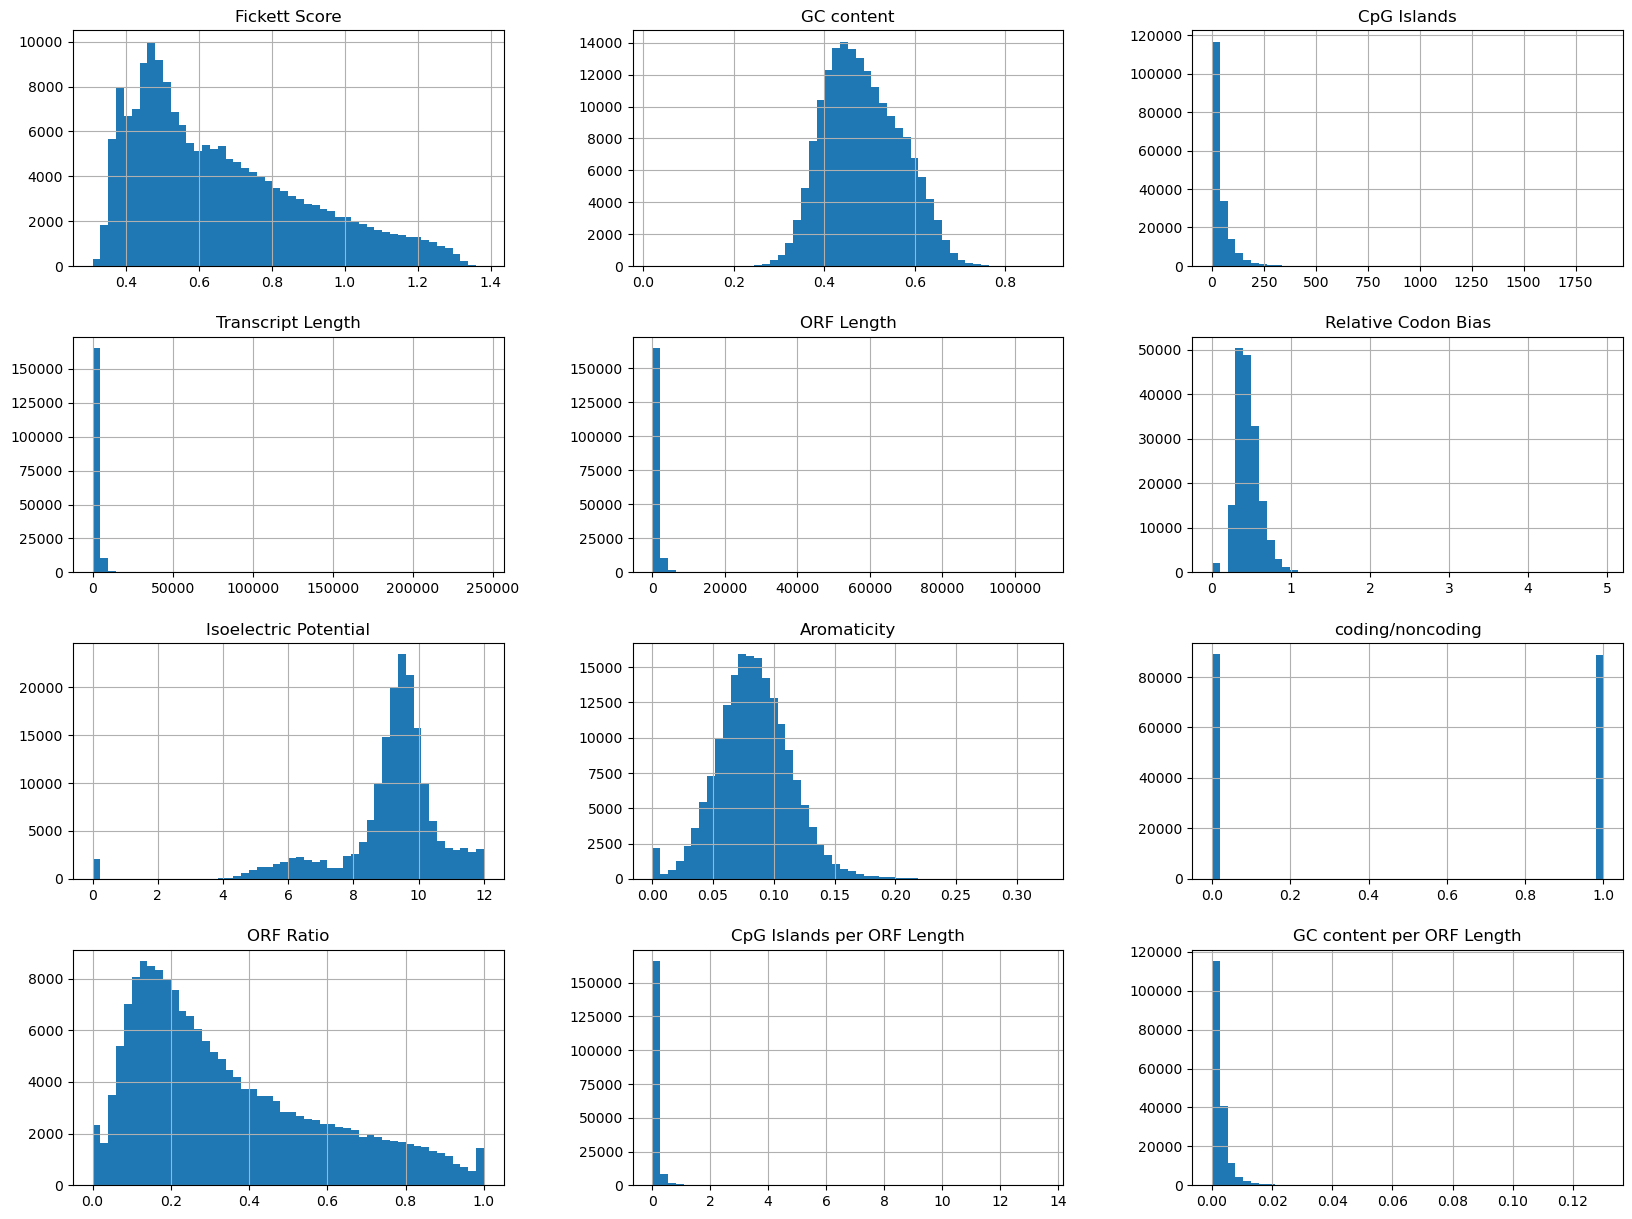

In [74]:
train.hist(bins=50, figsize=(20,15))  #plotting data
plt.show()

## Scatter Plots

In [78]:
corr_matrix


Fickett Score  GC content  CpG Islands  \
Fickett Score                    1.000000    0.497437     0.192274   
GC content                       0.497437    1.000000     0.339529   
CpG Islands                      0.192274    0.339529     1.000000   
Transcript Length               -0.105916   -0.084816     0.700800   
ORF Length                       0.222274    0.054427     0.671722   
Relative Codon Bias              0.186330    0.131868    -0.347490   
Isoelectric Potential           -0.101824    0.016280     0.137879   
Aromaticity                     -0.387855   -0.631431    -0.143681   
coding/noncoding                 0.434522    0.232418     0.381152   
ORF Ratio                        0.487865    0.213257     0.281760   
CpG Islands per ORF Length       0.057743    0.265850     0.106394   
GC content per ORF Length        0.046732    0.077327    -0.218259   

                            Transcript Length  ORF Length  \
Fickett Score                       -0.105916    0.222274   
GC content                          -0.084816    0.054427   
CpG Islands                          0.700800    0.671722   
Transcript Length                    1.000000    0.657168   
ORF Length                           0.657168    1.000000   
Relative Codon Bias                 -0.433424   -0.266397   
Isoelectric Potential                0.081379    0.031473   
Aromaticity                          0.119314   -0.016789   
coding/noncoding                     0.260474    0.403642   
ORF Ratio                            0.098904    0.526960   
CpG Islands per ORF Length           0.011007   -0.126900   
GC content per ORF Length           -0.245478   -0.238015   

                            Relative Codon Bias  Isoelectric Potential  \
Fickett Score                          0.186330              -0.101824   
GC content                             0.131868               0.016280   
CpG Islands                           -0.347490               0.137879   
Transcript Length                     -0.433424               0.081379   
ORF Length                            -0.266397               0.031473   
Relative Codon Bias                    1.000000               0.061215   
Isoelectric Potential                  0.061215               1.000000   
Aromaticity                           -0.085781               0.115689   
coding/noncoding                      -0.254287               0.041643   
ORF Ratio                              0.044162               0.046639   
CpG Islands per ORF Length             0.026634               0.133636   
GC content per ORF Length              0.382146               0.021793   

                            Aromaticity  coding/noncoding  ORF Ratio  \
Fickett Score                 -0.387855          0.434522   0.487865   
GC content                    -0.631431          0.232418   0.213257   
CpG Islands                   -0.143681          0.381152   0.281760   
Transcript Length              0.119314          0.260474   0.098904   
ORF Length                    -0.016789          0.403642   0.526960   
Relative Codon Bias           -0.085781         -0.254287   0.044162   
Isoelectric Potential          0.115689          0.041643   0.046639   
Aromaticity                    1.000000         -0.095537  -0.109170   
coding/noncoding              -0.095537          1.000000   0.478738   
ORF Ratio                     -0.109170          0.478738   1.000000   
CpG Islands per ORF Length    -0.138794         -0.007662  -0.279783   
GC content per ORF Length     -0.072407         -0.203268  -0.336023   

                            CpG Islands per ORF Length  \
Fickett Score                                 0.057743   
GC content                                    0.265850   
CpG Islands                                   0.106394   
Transcript Length                             0.011007   
ORF Length                                   -0.126900   
Relative Codon Bias                           0.026634   
Isoelectric Poten

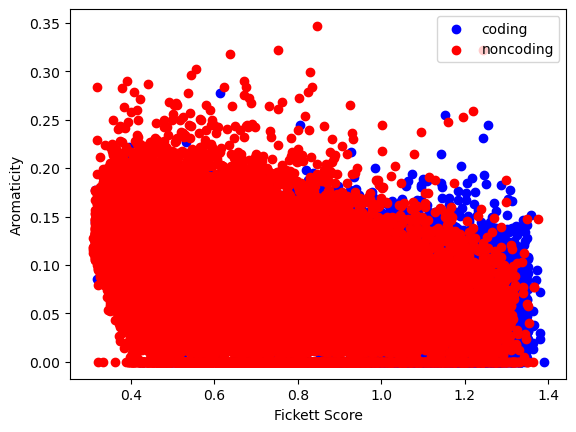

In [75]:
import matplotlib.pyplot as plt

# create the plot
plt.scatter(coding['Fickett Score'], coding['Aromaticity'], c='blue', label='coding')
plt.scatter(noncoding['Fickett Score'], noncoding['Aromaticity'], c='red', label='noncoding')

# set plot labels
plt.xlabel('Fickett Score')
plt.ylabel('Aromaticity')
plt.legend(loc='upper right')

# show the plot
plt.show()


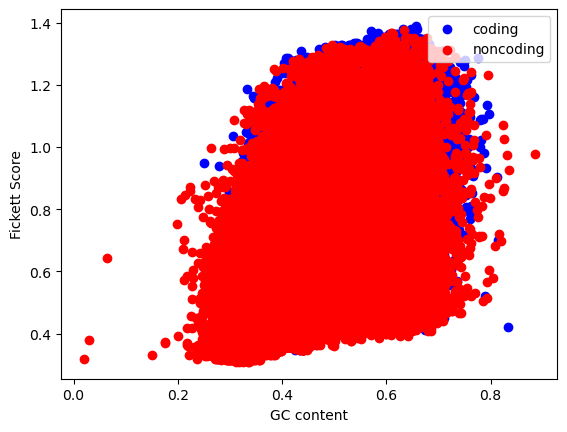

In [80]:
import matplotlib.pyplot as plt

# create the plot
plt.scatter(coding['GC content'], coding['Fickett Score'], c='blue', label='coding')
plt.scatter(noncoding['GC content'], noncoding['Fickett Score'], c='red', label='noncoding')

# set plot labels
plt.xlabel('GC content')
plt.ylabel('Fickett Score')
plt.legend(loc='upper right')

# show the plot
plt.show()


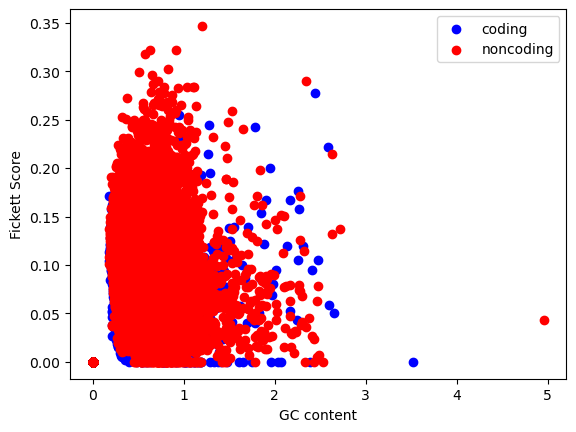

In [86]:
import matplotlib.pyplot as plt

# create the plot
plt.scatter(coding['Relative Codon Bias'], coding['Aromaticity'], c='blue', label='coding')
plt.scatter(noncoding['Relative Codon Bias'], noncoding['Aromaticity'], c='red', label='noncoding')

# set plot labels
plt.xlabel('GC content')
plt.ylabel('Fickett Score')
plt.legend(loc='upper right')

# show the plot
plt.show()


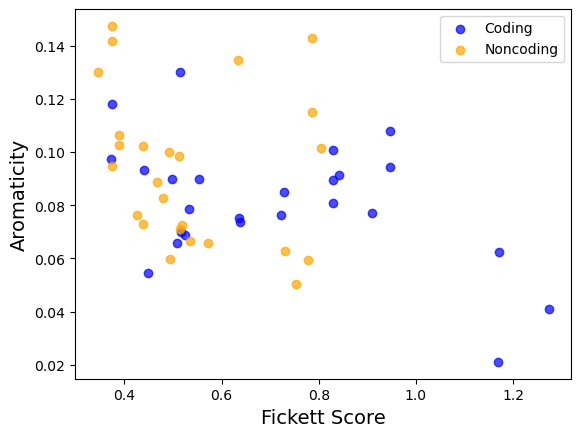

In [95]:
import matplotlib.pyplot as plt
import random

# randomly sample 1000 points from each dataset
coding_sample = coding.sample(n=25, random_state=1)
noncoding_sample = noncoding.sample(n=25, random_state=1)

# create the plot
plt.scatter(coding_sample['Fickett Score'], coding_sample['Aromaticity'], c='blue', label='Coding', alpha = 0.7)
plt.scatter(noncoding_sample['Fickett Score'], noncoding_sample['Aromaticity'], c='orange', label='Noncoding', alpha = 0.7)

# set plot labels
plt.xlabel('Fickett Score', fontsize = 14)
plt.ylabel('Aromaticity', fontsize = 14)
plt.legend(loc='upper right')

# show the plot
plt.show()


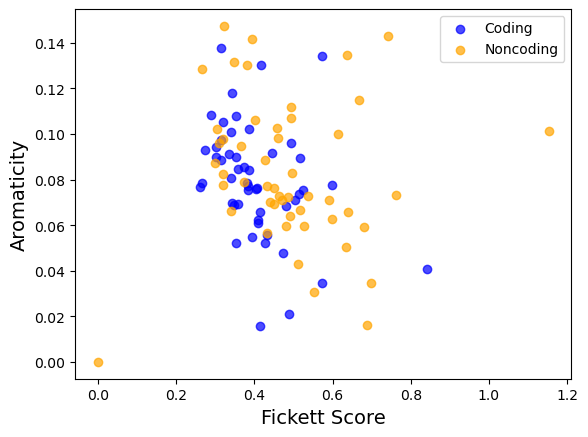

In [88]:
import matplotlib.pyplot as plt
import random

# randomly sample 1000 points from each dataset
coding_sample = coding.sample(n=50, random_state=1)
noncoding_sample = noncoding.sample(n=50, random_state=1)

# create the plot
plt.scatter(coding_sample['Relative Codon Bias'], coding_sample['Aromaticity'], c='blue', label='Coding', alpha = 0.7)
plt.scatter(noncoding_sample['Relative Codon Bias'], noncoding_sample['Aromaticity'], c='orange', label='Noncoding', alpha = 0.7)

# set plot labels
plt.xlabel('Fickett Score', fontsize = 14)
plt.ylabel('Aromaticity', fontsize = 14)
plt.legend(loc='upper right')

# show the plot
plt.show()


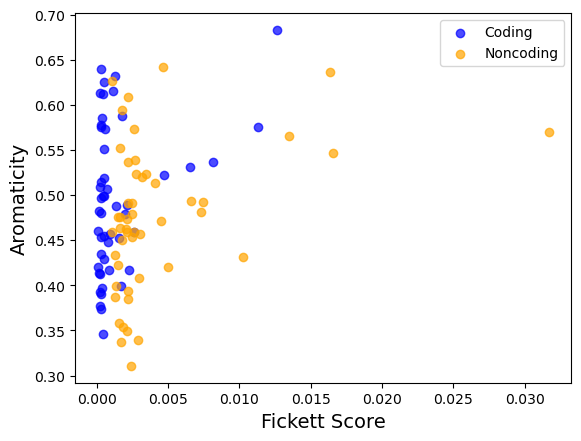

In [90]:
import matplotlib.pyplot as plt
import random

# randomly sample 1000 points from each dataset
coding_sample = coding.sample(n=50, random_state=1)
noncoding_sample = noncoding.sample(n=50, random_state=1)

# create the plot
plt.scatter(coding_sample['GC content per ORF Length'], coding_sample['GC content'], c='blue', label='Coding', alpha = 0.7)
plt.scatter(noncoding_sample['GC content per ORF Length'], noncoding_sample['GC content'], c='orange', label='Noncoding', alpha = 0.7)

# set plot labels
plt.xlabel('GC content per ORF Length', fontsize = 14)
plt.ylabel('GC content', fontsize = 14)
plt.legend(loc='upper right')

# show the plot
plt.show()


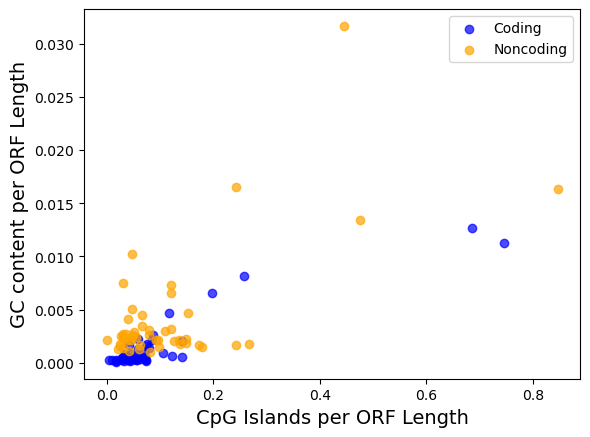

In [94]:
import matplotlib.pyplot as plt
import random

# randomly sample 1000 points from each dataset
coding_sample = coding.sample(n=50, random_state=1)
noncoding_sample = noncoding.sample(n=50, random_state=1)

# create the plot
plt.scatter(coding_sample['CpG Islands per ORF Length'], coding_sample['GC content per ORF Length'], c='blue', label='Coding', alpha = 0.7)
plt.scatter(noncoding_sample['CpG Islands per ORF Length'], noncoding_sample['GC content per ORF Length'], c='orange', label='Noncoding', alpha = 0.7)

# set plot labels
plt.xlabel('CpG Islands per ORF Length', fontsize = 14)
plt.ylabel('GC content per ORF Length', fontsize = 14)
plt.legend(loc='upper right')

# show the plot
plt.show()


### Trying out all scatter plots using seaborn (pairplot)

In [83]:
import seaborn as sns

In [84]:
shuffled_dataset

Fickett Score  GC content  CpG Islands  Transcript Length  ORF Length  \
130060         0.4871    0.440096           15               1252         246   
122973         0.4975    0.634871           89               1279         186   
143354         0.3740    0.402494            9               2005         201   
210043         0.4390    0.480164           11                731         141   
106295         1.2011    0.611160           65               1147         681   
...               ...         ...          ...                ...         ...   
119879         0.4394    0.467187            4                640         138   
103694         0.6674    0.402305          131               5379        3378   
131932         0.3939    0.463635          118               5651         330   
146867         0.4794    0.401091            2                733         159   
121958         0.5052    0.641994           54                662         381   

        Relative Codon Bias  Isoelectric Potential  Aromaticity  \
130060             0.418197               9.973082     0.086331   
122973             0.365943              11.686200     0.042254   
143354             0.371544               9.831574     0.079341   
210043             0.427099               7.667375     0.106996   
106295             0.424952              10.347965     0.023560   
...                     ...                    ...          ...   
119879             0.482877               9.163359     0.089202   
103694             0.282702               9.935884     0.108199   
131932             0.332367               9.824224     0.101488   
146867             0.525984               9.331428     0.098361   
121958             0.562596               8.987811     0.027273   

        coding/noncoding  ORF Ratio  CpG Islands per ORF Length  \
130060                 0   0.196486                    0.060976   
122973                 0   0.145426                    0.478495   
143354                 0   0.100249                    0.044776   
210043                 0   0.192886                    0.078014   
106295                 1   0.593723                    0.095448   
...                  ...        ...                         ...   
119879                 0   0.215625                    0.028986   
103694                 1   0.627998                    0.038780   
131932                 0   0.058397                    0.357576   
146867                 0   0.216917                    0.012579   
121958                 0   0.575529                    0.141732   

        GC content per ORF Length  
130060                   0.001789  
122973                   0.003413  
143354                   0.002002  
210043                   0.003405  
106295                   0.000897  
...                           ...  
119879                   0.003385  
103694                   0.000119  
131932                   0.001405  
146867                   0.002523  
121958                   0.001685  

[222400 rows x 12 columns]

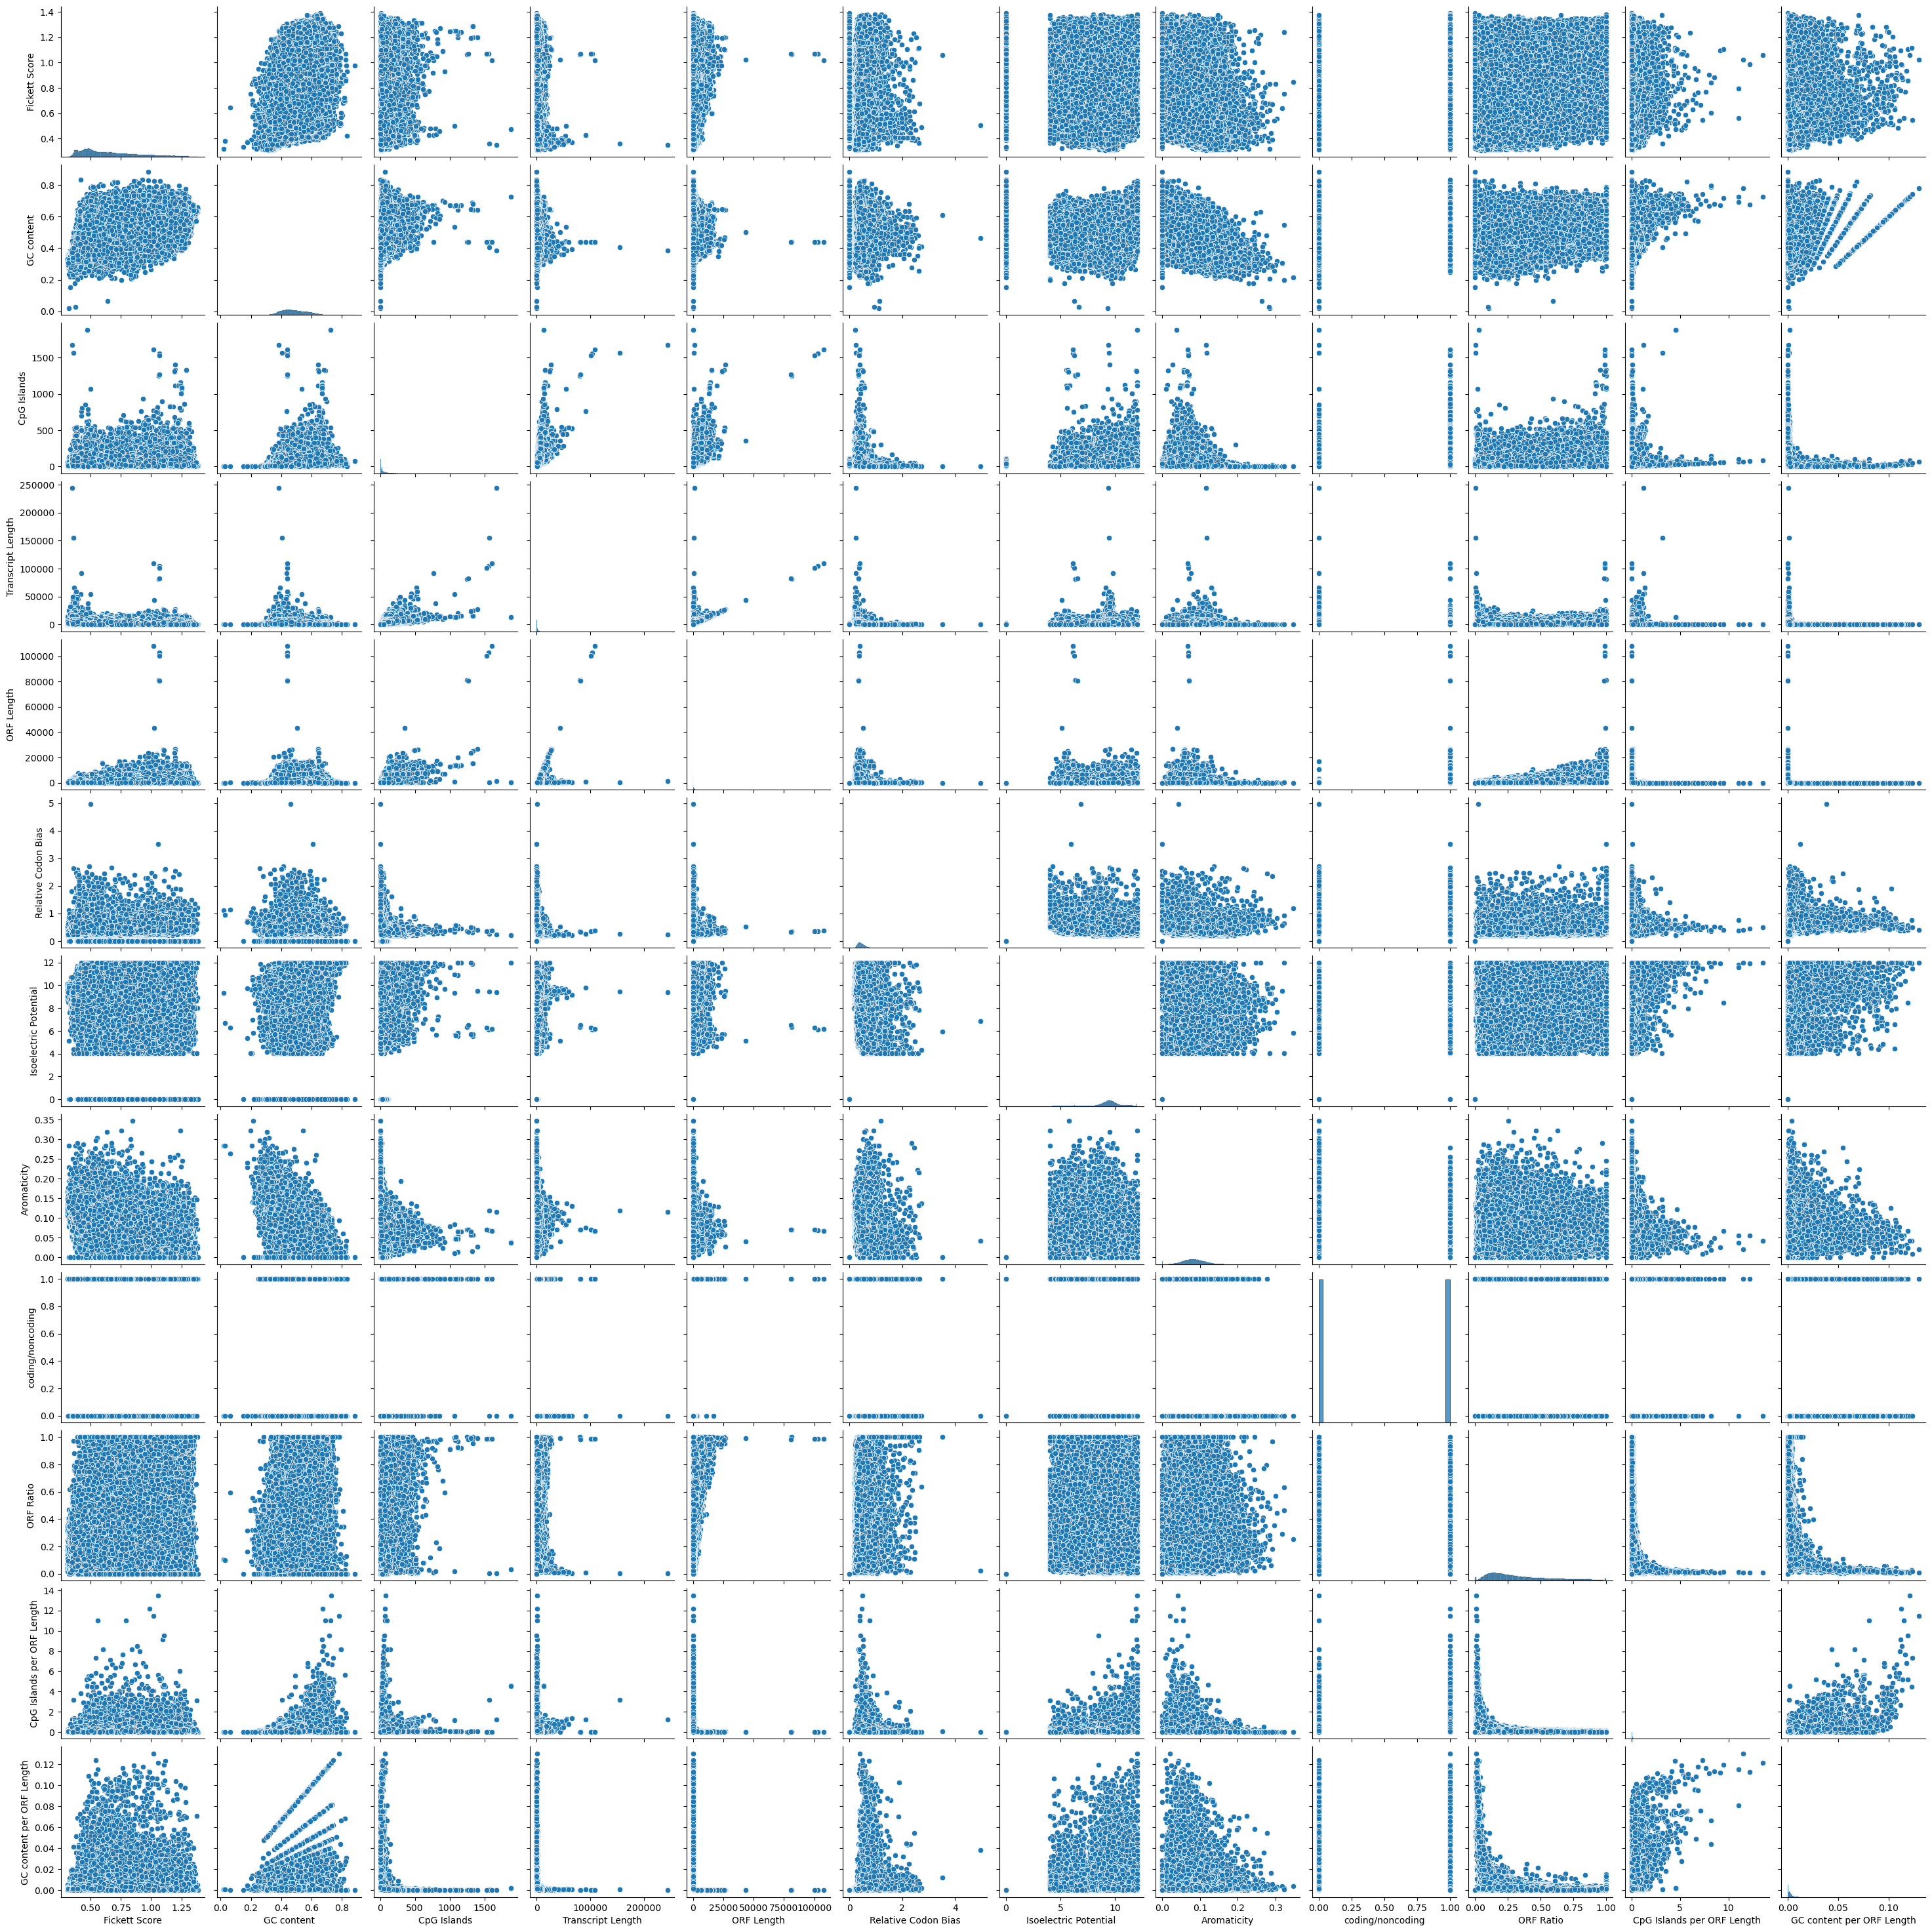

In [85]:
sns.pairplot(data=shuffled_dataset, kind='scatter')

### Heat Map

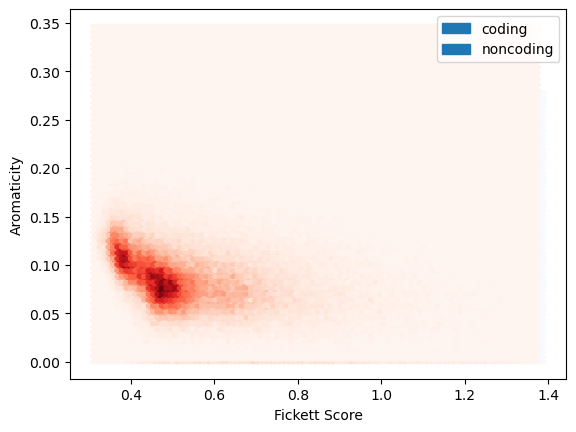

In [76]:
import matplotlib.pyplot as plt

# create the plot
plt.hexbin(coding['Fickett Score'], coding['Aromaticity'], gridsize=100, cmap='Blues')
plt.hexbin(noncoding['Fickett Score'], noncoding['Aromaticity'], gridsize=100, cmap='Reds')

# set plot labels
plt.xlabel('Fickett Score')
plt.ylabel('Aromaticity')
plt.legend(['coding', 'noncoding'])

# show the plot
plt.show()


## Feature Importance Graph

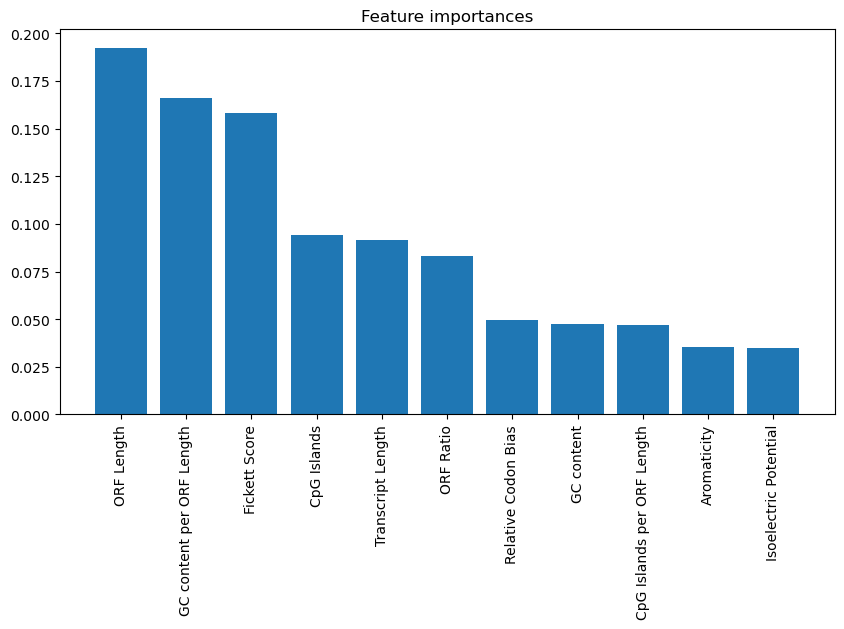

In [62]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Train a random forest classifier on the training data
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Get feature importances and their indices
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()


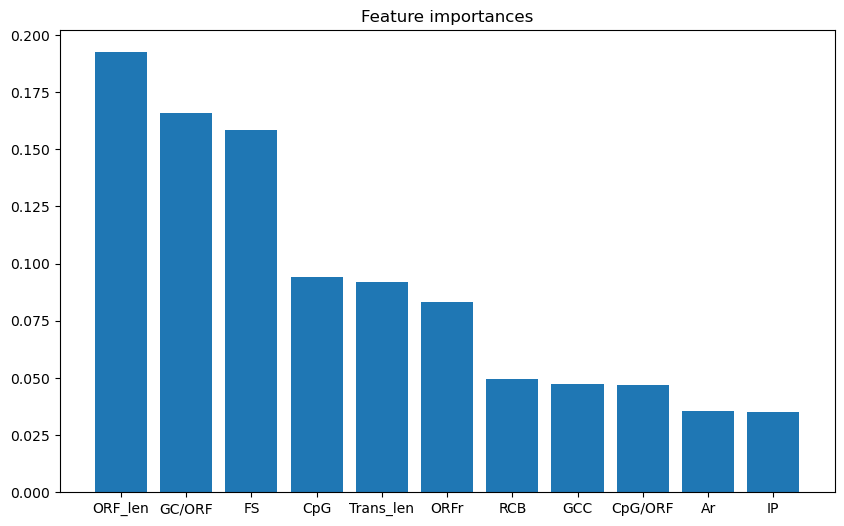

In [63]:
# Define a dictionary of short names for each feature
short_names = {
    'GC content per ORF Length': 'GC/ORF',
    'ORF Length': 'ORF_len',
    'Fickett Score': 'FS',
    'CpG Islands' : 'CpG',
    'Transcript Length' : 'Trans_len',
    'ORF Ratio' : 'ORFr',
    'CpG Islands per ORF Length' : 'CpG/ORF',
    'Relative Codon Bias' : 'RCB',
    'GC content' : 'GCC',
    'Aromaticity' : 'Ar',
    'Isoelectric Potential' : 'IP'
    # Add short names for each feature here
}

# Generate a list of new x-axis labels using the short names dictionary
new_labels = [short_names.get(col, col) for col in X_train.columns[indices]]

# Plot the feature importances with the new x-axis labels
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), new_labels, rotation=0)
plt.show()


## Different Feature Importance plots

In [65]:
import pandas as pd
import numpy as np
# from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [66]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16, 6)

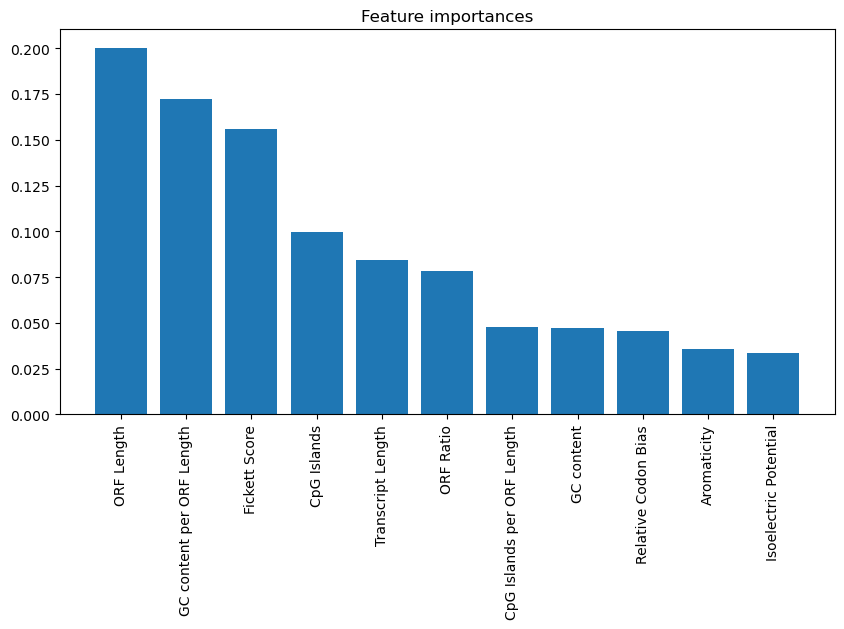

In [67]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Train a random forest classifier on the training data
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Get feature importances and their indices
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()


In [81]:
importances_df = pd.Dataframe({'feature': X_train.columns, 'importance': importances})
importances_df = importances_df.sort_values('importance', ascending=False)

AttributeError: module 'pandas' has no attribute 'Dataframe'

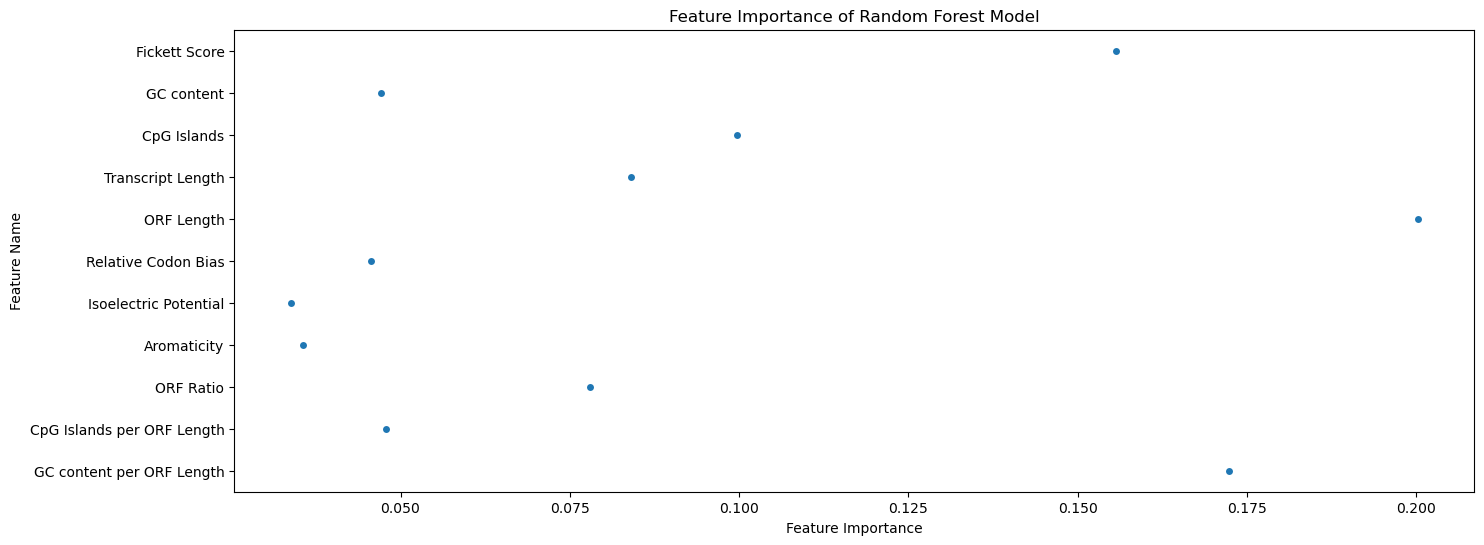

In [80]:
feature_importances = rf.feature_importances_

# Create Pandas DataFrame with feature names and importances
df = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importances})

# Create swarmplot
sns.swarmplot(x='importance', y='feature', data=df)

# Set plot labels and title
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance of Random Forest Model')
plt.show()

In [71]:
melt = pd.melt(shuffled_dataset, var_name='feature name', value_name='values')

In [77]:
melt.head()

feature name  values
0  Fickett Score  0.4871
1  Fickett Score  0.4975
2  Fickett Score  0.3740
3  Fickett Score  0.4390
4  Fickett Score  1.2011

In [ ]:
df_feature_importance = pd.DataFrame(reg.feature_importances_, index=boston.feature_names, columns=['feature importance']).sort_values('feature importance', ascending=False)

In [78]:
sns.swarmplot(x="feature name", y="values", data=melt);


KeyboardInterrupt



Error in callback <function flush_figures at 0x7fc20d14a200> (for post_execute):


KeyboardInterrupt: 

### Density Plot

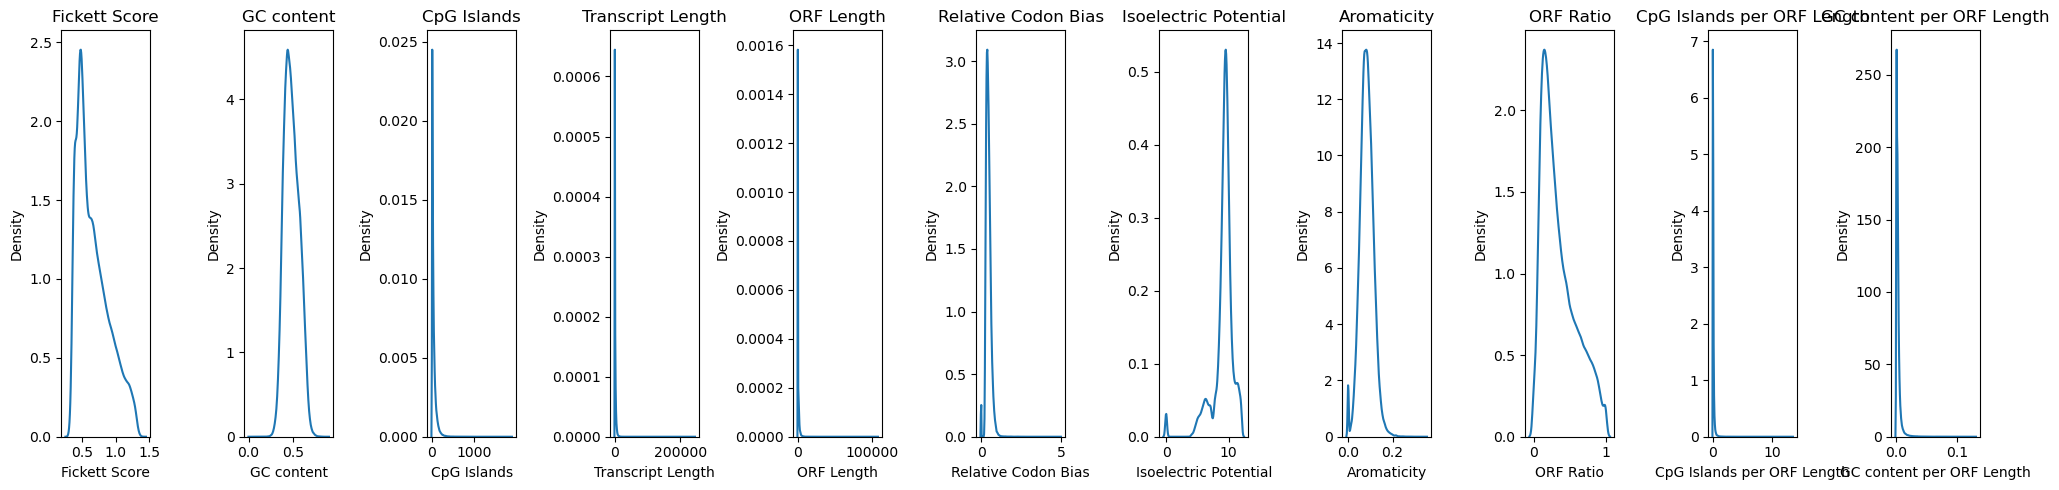

In [98]:
import seaborn as sns


df = shuffled_dataset.drop(["coding/noncoding"], axis=1)

# Create subplots for each column in the dataframe
fig, axs = plt.subplots(ncols=len(df.columns), figsize=(20, 5))

# Loop through each column and create a density plot
for i, col in enumerate(df.columns):
    sns.kdeplot(df[col], ax=axs[i])
    axs[i].set_title(col)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


### Bar Graph for LR, RF, NB

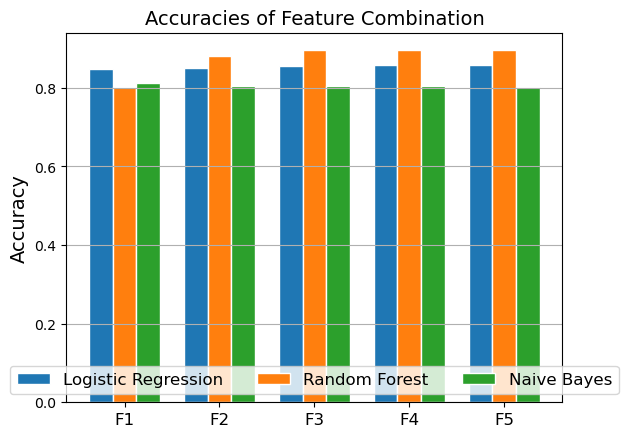

In [108]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
features = ['F1', 'F2', 'F3', 'F4', 'F5']
logistic_acc = [0.84683, 0.85038, 0.85440, 0.85811, 0.85888]
rf_acc = [0.80161, 0.87969, 0.895188, 0.8953462, 0.895256]
naive_bayes = [0.81274, 0.80391, 0.80447, 0.80420, 0.80141]

# Set the width of the bars
bar_width = 0.25

# Set the x position of the bars
r1 = np.arange(len(features))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the figure and axis
fig, ax = plt.subplots()

# Create the bars for logistic regression
ax.bar(r1, logistic_acc, width=bar_width, edgecolor='white', label='Logistic Regression', color='C0')

# Create the bars for random forest
ax.bar(r2, rf_acc, width=bar_width, edgecolor='white', label='Random Forest', color='C1')

# Create the bars for naive bayes
ax.bar(r3, naive_bayes, width=bar_width, edgecolor='white', label='Naive Bayes', color='C2')

# Set the x-axis tick labels
ax.set_xticks([r + bar_width for r in range(len(features))])
ax.set_xticklabels(features, fontsize=12)

# Set the y-axis label and title
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_title('Accuracies of Feature Combination', fontsize=14)

# Add gridlines
ax.yaxis.grid(True)

# Add a legend
ax.legend(loc='lower center', ncol=3, fontsize=12)

# Show the plot
plt.show()


### Bar Graph for LR, RF, NB, MLP

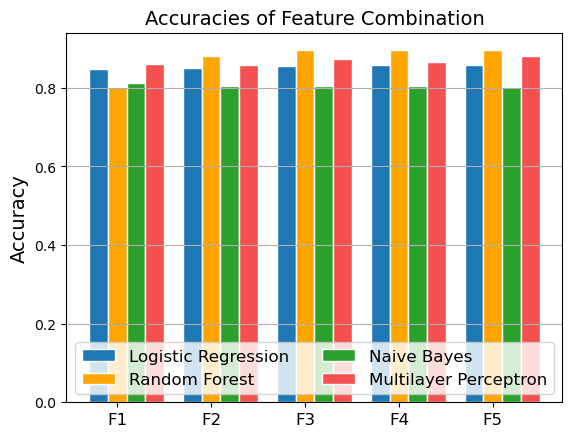

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
features = ['F1', 'F2', 'F3', 'F4', 'F5']
logistic_acc = [0.84683, 0.85038, 0.85440, 0.85811, 0.85888]
rf_acc = [0.80161, 0.87969, 0.895188, 0.8953462, 0.895256]
naive_bayes = [0.81274, 0.80391, 0.80447, 0.80420, 0.80141]
mlp = [0.86130, 0.85870, 0.87340, 0.86661, 0.88102]

# Set the width of the bars
bar_width = 0.20

# Set the x position of the bars
r1 = np.arange(len(features))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create the figure and axis
fig, ax = plt.subplots()

# Create the bars for logistic regression
ax.bar(r1, logistic_acc, width=bar_width, edgecolor='white', label='Logistic Regression', color='C0')

# Create the bars for random forest
ax.bar(r2, rf_acc, width=bar_width, edgecolor='white', label='Random Forest', color='orange')

# Create the bars for naive bayes
ax.bar(r3, naive_bayes, width=bar_width, edgecolor='white', label='Naive Bayes', color='C2')

# Create the bars for mlp
ax.bar(r4, mlp, width=bar_width, edgecolor='white', label='Multilayer Perceptron', color='#F45050')

# Set the x-axis tick labels
ax.set_xticks([r + bar_width for r in range(len(features))])
ax.set_xticklabels(features, fontsize=12)

# Set the y-axis label and title
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_title('Accuracies of Feature Combination', fontsize=14)

# Add gridlines
ax.yaxis.grid(True)

# Add a legend
ax.legend(loc='lower center', ncol=2, fontsize=12)

# Show the plot
plt.show()


### Precision

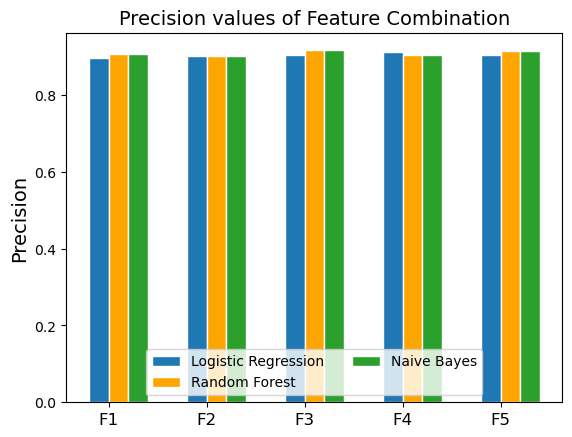

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
features = ['F1', 'F2', 'F3', 'F4', 'F5']
logistic_acc = [0.8969, 0.9020, 0.90318,  0.913, 0.90449]
rf_acc = [0.90722, 0.90071, 0.916253, 0.90341, 0.914942]
naive_bayes = [0.91662, 0.91706, 0.91576, 0.92343, 0.92519]
# mlp = [0.90946, 0.91803, 0.88950, 0.92203, 0.90603]
# Set the width of the bars
bar_width = 0.20

# Set the x position of the bars
r1 = np.arange(len(features))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
# r4 = [x + bar_width for x in r3]

# Create the figure and axis
fig, ax = plt.subplots()

# Create the bars for logistic regression
ax.bar(r1, logistic_acc, width=bar_width, edgecolor='white', label='Logistic Regression')

# Create the bars for random forest
ax.bar(r2, rf_acc, width=bar_width, edgecolor='white', label='Random Forest', color='orange')

ax.bar(r3, rf_acc, width=bar_width, edgecolor='white', label='Naive Bayes', color='C2')

# ax.bar(r4, rf_acc, width=bar_width, edgecolor='white', label='Multilayer Perceptron', color='#F45050')

# Set the x-axis tick labels
ax.set_xticks([r + bar_width/2 for r in range(len(features))])
ax.set_xticklabels(features, fontsize=12)

# Set the y-axis label and title
ax.set_ylabel('Precision', fontsize=14)
ax.set_title('Precision values of Feature Combination', fontsize=14)



# Add a legend
ax.legend(loc = "lower center", ncol=2)

# Show the plot
plt.show()


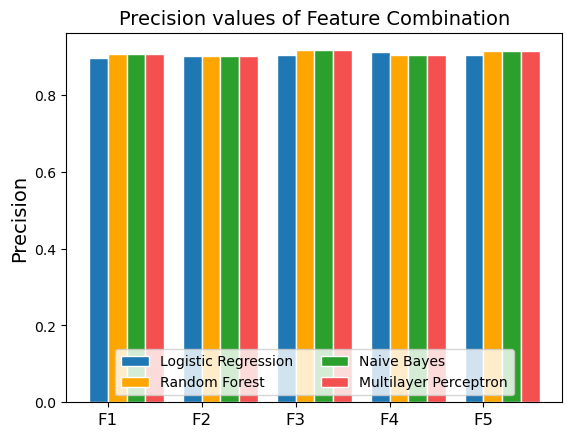

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
features = ['F1', 'F2', 'F3', 'F4', 'F5']
logistic_acc = [0.8969, 0.9020, 0.90318,  0.913, 0.90449]
rf_acc = [0.90722, 0.90071, 0.916253, 0.90341, 0.914942]
naive_bayes = [0.91662, 0.91706, 0.91576, 0.92343, 0.92519]
mlp = [0.90946, 0.91803, 0.88950, 0.92203, 0.90603]
# Set the width of the bars
bar_width = 0.20

# Set the x position of the bars
r1 = np.arange(len(features))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create the figure and axis
fig, ax = plt.subplots()

# Create the bars for logistic regression
ax.bar(r1, logistic_acc, width=bar_width, edgecolor='white', label='Logistic Regression')

# Create the bars for random forest
ax.bar(r2, rf_acc, width=bar_width, edgecolor='white', label='Random Forest', color='orange')

ax.bar(r3, rf_acc, width=bar_width, edgecolor='white', label='Naive Bayes', color='C2')

ax.bar(r4, rf_acc, width=bar_width, edgecolor='white', label='Multilayer Perceptron', color='#F45050')

# Set the x-axis tick labels
ax.set_xticks([r + bar_width/2 for r in range(len(features))])
ax.set_xticklabels(features, fontsize=12)

# Set the y-axis label and title
ax.set_ylabel('Precision', fontsize=14)
ax.set_title('Precision values of Feature Combination', fontsize=14)



# Add a legend
ax.legend(loc = "lower center", ncol=2)

# Show the plot
plt.show()


## Bar Graphs

### Aromaticity

In [34]:
Aromaticity_coding = coding["Aromaticity"].mean()

In [35]:
Aromaticity_noncoding = noncoding["Aromaticity"].mean()

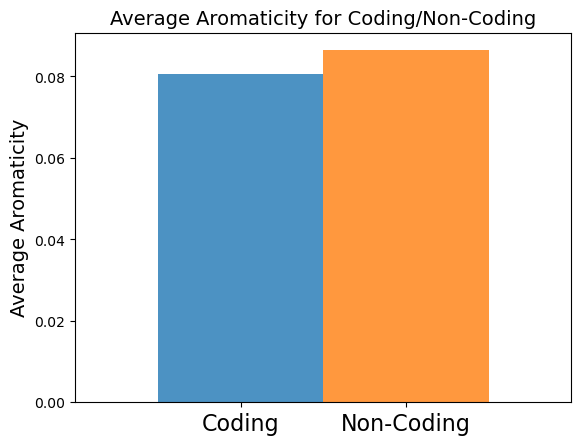

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Create some example data
values = [Aromaticity_coding, Aromaticity_noncoding]

# Set the positions of the bars on the x-axis
x_pos = np.arange(len(values))

# Set the width of the bars
width = 1
padding = 1

colors = ['#1f77b4', '#ff7f0e']
# Create the bar graph
plt.bar(x_pos, values, width, align='center', alpha=0.8, color = colors)

# Set the x-axis labels
plt.xticks(x_pos, ['Coding', 'Non-Coding'], fontsize = 16, ha='center')

# Set the y-axis label and title
plt.ylabel('Average Aromaticity', fontsize = 14)
plt.title('Average Aromaticity for Coding/Non-Coding', fontsize = 14)
plt.xlim(x_pos[0]-padding, x_pos[-1]+padding)


# Show the plot
plt.show()


### Fickett Score

In [37]:
Fickett_mean_value_coding = coding["Fickett Score"].mean()

In [38]:
Fickett_mean_value_nc = noncoding["Fickett Score"].mean()

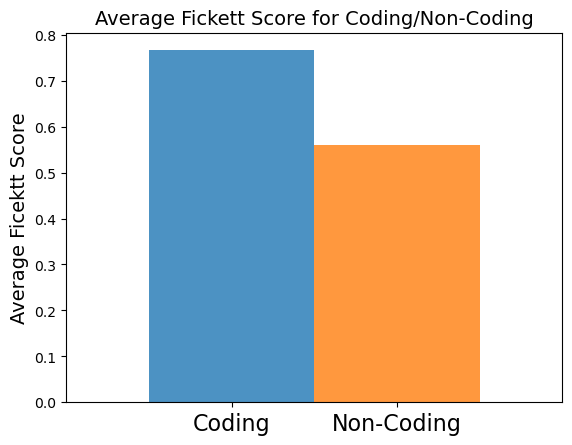

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Create some example data
values = [Fickett_mean_value_coding, Fickett_mean_value_nc]

# Set the positions of the bars on the x-axis
x_pos = np.arange(len(values))

# Set the width of the bars
width = 1
padding = 1

colors = ['#1f77b4', '#ff7f0e']
# Create the bar graph
plt.bar(x_pos, values, width, align='center', alpha=0.8, color = colors)

# Set the x-axis labels
plt.xticks(x_pos, ['Coding', 'Non-Coding'], fontsize = 16, ha='center')

# Set the y-axis label and title
plt.ylabel('Average Ficektt Score', fontsize = 14)
plt.title('Average Fickett Score for Coding/Non-Coding', fontsize = 14)
plt.xlim(x_pos[0]-padding, x_pos[-1]+padding)


# Show the plot
plt.show()


### ORF Length

In [40]:
ORF_mean_value_coding = coding["ORF Length"].mean()

In [41]:
ORF_mean_value_nc = noncoding["ORF Length"].mean()

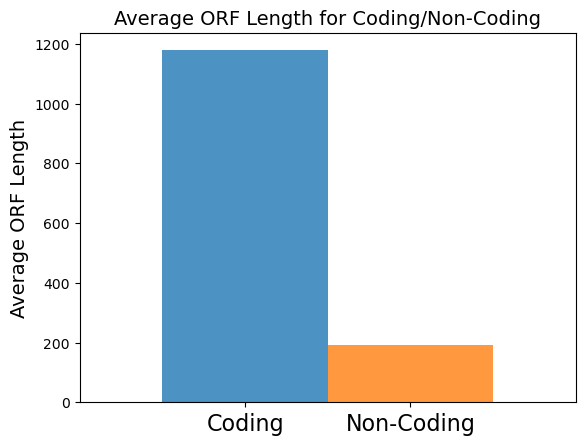

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Create some example data
values = [ORF_mean_value_coding, ORF_mean_value_nc]

# Set the positions of the bars on the x-axis
x_pos = np.arange(len(values))

# Set the width of the bars
width = 1
padding = 1

colors = ['#1f77b4', '#ff7f0e']
# Create the bar graph
plt.bar(x_pos, values, width, align='center', alpha=0.8, color = colors)

# Set the x-axis labels
plt.xticks(x_pos, ['Coding', 'Non-Coding'], fontsize = 16, ha='center')

# Set the y-axis label and title
plt.ylabel('Average ORF Length', fontsize = 14)
plt.title('Average ORF Length for Coding/Non-Coding', fontsize = 14)
plt.xlim(x_pos[0]-padding, x_pos[-1]+padding)


# Show the plot
plt.show()
